# 0. Setup

Import packages and specify any important functions here.

In [1]:
# import standard python packages
import pandas as pd
import subprocess
import os
import dill
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# add the utils and env directories to the path
import sys
sys.path.append('../../utils/')
sys.path.append('../../env/')

# import functions from utils directory files
from string_functions import *
from biofile_handling import *
from scanpy_wrappers import *

# import paths to software installs from env
from install_locs import *

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
/home/ec2-user/glial-origins
outputty/ does not exist; making it now


In [2]:
################
# general info #
################

# Specify the name of the species folder in Amazon S3
species = 'Danio_rerio'

# Specify any particular identifying conditions, eg tissue type:
conditions = 'adultbrain'

################

species_prefix = prefixify(species)

# Specify folder as destination for file downloads
output_folder = '../../output/' + prefixify(species) + '_' + conditions + '/'

if not os.path.exists(output_folder):
    os.mkdir(output_folder)
    
species_SampleDict = SampleDict(species, conditions, output_folder)
species_BioFileDocket = BioFileDocket(species_SampleDict).unpickle()

In [3]:
gxc = pd.read_csv(species_BioFileDocket.gxc.path, sep = '\t')
display(gxc)
exc = pd.read_csv(species_BioFileDocket.Orthogroup_exc.path, sep = '\t')
display(exc)

,GENE,ACAATATATTGTACCTGA,ACGTTGATGGCGTAGAGA,AACCTAACCTGAATTTGC,CTCGCAGCCCTCTATGTA,ACGTTGCGTATTTAGTCG,AACCTATAGAGACCGACG,ACGAGCGCTGTGGCCTAG,GCGAATGGACATGGACAT,TCTACCGCTCAAGCTCAA,...,CGGCAGTCAAAGATCTCT,GACACTGCGAATCTGTGT,GCAGGAGGCTGCTAAGGG,TATGTATACTTCCGCACC,TGGATGTTCCGCACAATA,AACCTATGGATGGGGTTT,AAGCGGAGGACTCTCCAT,ACCTGACTCGCAAGCGAG,ACGTTGCAAAGTTTCATA,ATCAACTGCAATTTCCGC
0,ABCF3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACOT12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACSF3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACTC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACVR1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802,zwilch,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20803,zyg11,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
20804,zyx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20805,zzef1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Orthogroup,ACAATATATTGTACCTGA,ACGTTGATGGCGTAGAGA,AACCTAACCTGAATTTGC,CTCGCAGCCCTCTATGTA,ACGTTGCGTATTTAGTCG,AACCTATAGAGACCGACG,ACGAGCGCTGTGGCCTAG,GCGAATGGACATGGACAT,TCTACCGCTCAAGCTCAA,...,CGGCAGTCAAAGATCTCT,GACACTGCGAATCTGTGT,GCAGGAGGCTGCTAAGGG,TATGTATACTTCCGCACC,TGGATGTTCCGCACAATA,AACCTATGGATGGGGTTT,AAGCGGAGGACTCTCCAT,ACCTGACTCGCAAGCGAG,ACGTTGCAAAGTTTCATA,ATCAACTGCAATTTCCGC
0,OG0000001,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,OG0000005,0,1,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0
2,OG0000009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OG0000013,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,OG0000014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13612,OG0030138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13613,OG0030139,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13614,OG0030140,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13615,OG0030141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scanpy_data = ScanpyMetaObject(
    matrix = species_BioFileDocket.gxc,
    sampledict = species_SampleDict
    )
scanpy_data.read()

... writing an h5ad cache file to speedup reading next time


normalizing counts per cell
    finished (0:00:01)


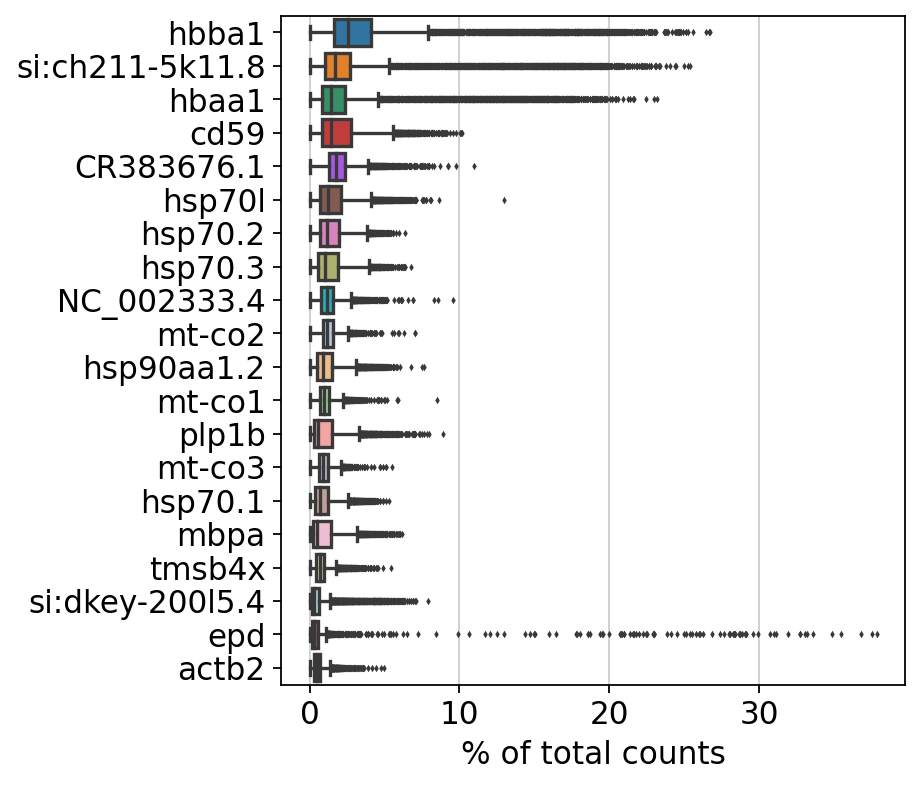

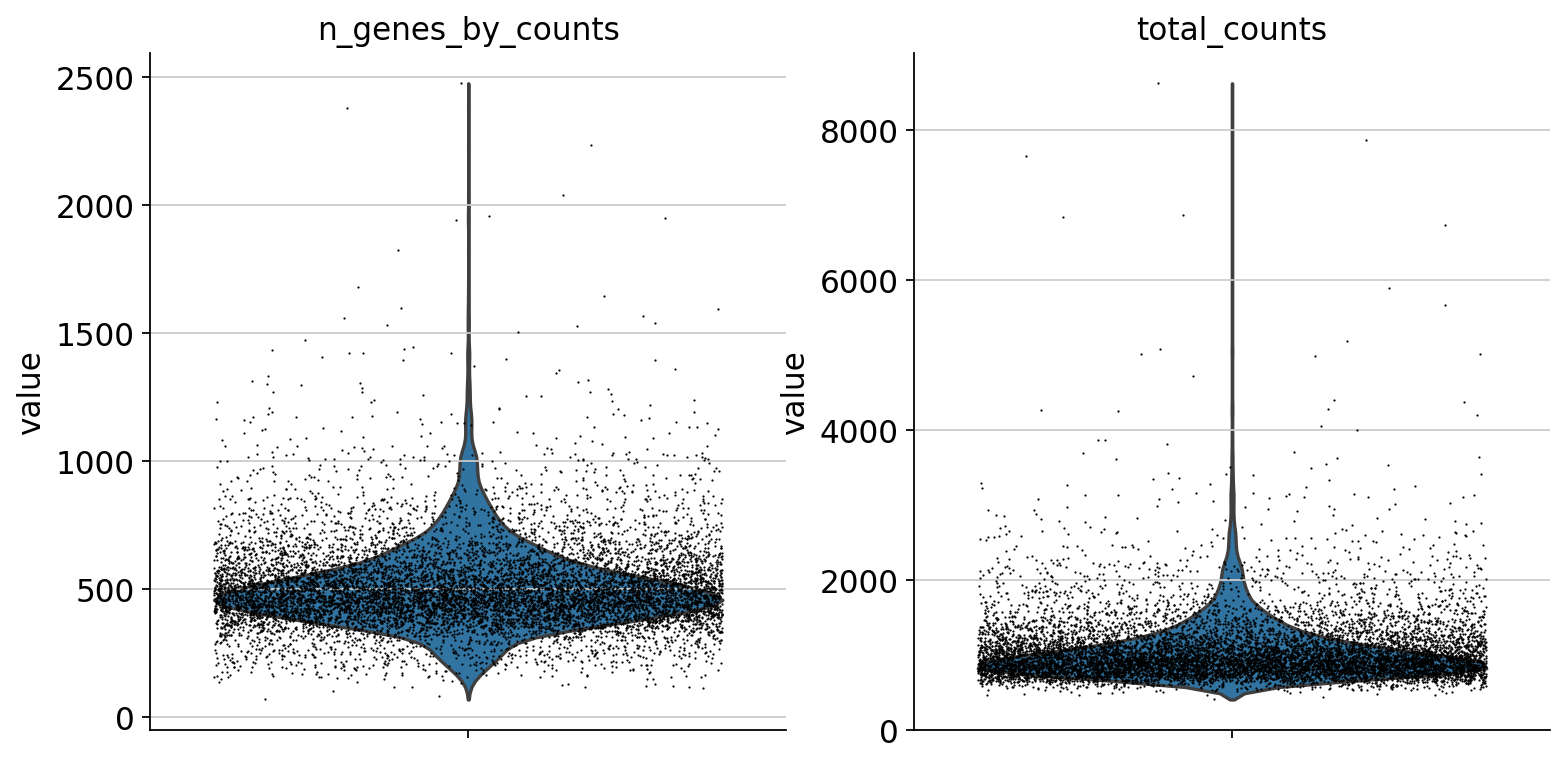

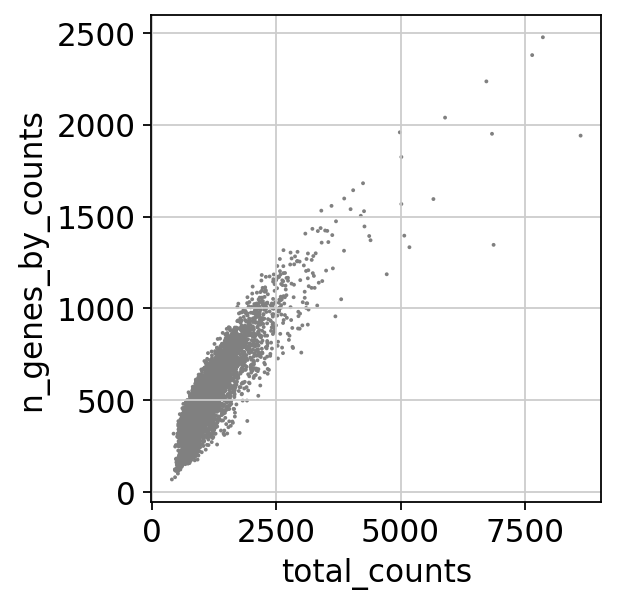

filtered out 2 cells that have less than 100 genes expressed
filtered out 8708 genes that are detected in less than 20 cells


/home/ec2-user/miniconda3/envs/glial_origins/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


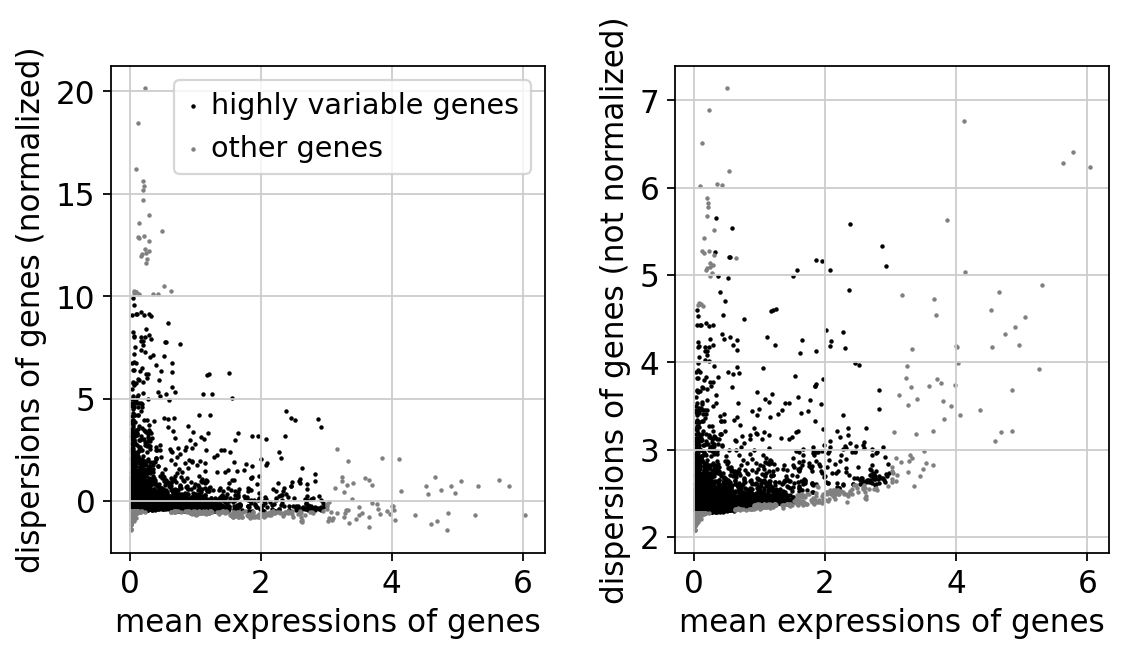

regressing out ['total_counts']
    finished (0:02:00)


In [5]:
sc.pl.highest_expr_genes(scanpy_data.adata, n_top=20, )
scanpy_data.violin()
scanpy_data.cellgene_filter(min_genes=100, min_cells=20)
scanpy_data.normalize(max_n_genes_by_counts = 7000, target_sum = 1e4)
scanpy_data.variable_filter(min_mean = 0.0125, max_mean = 3, min_disp = -0.5, max_disp = 10)
scanpy_data.regress_scale(how = ['total_counts'], max_value = 10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


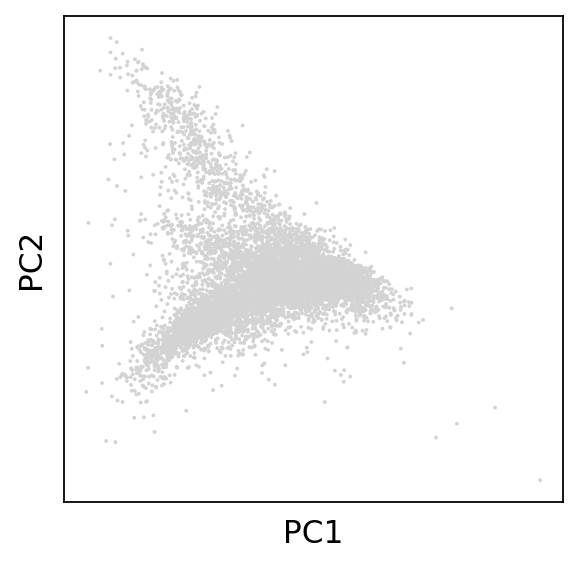

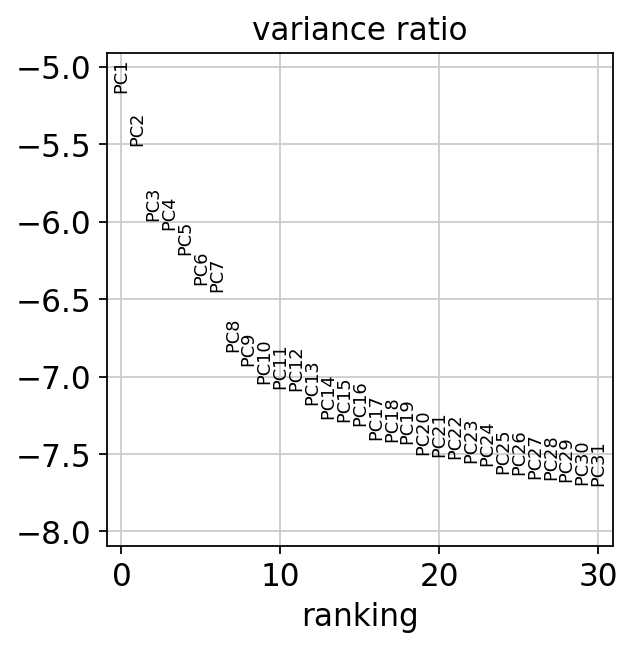

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


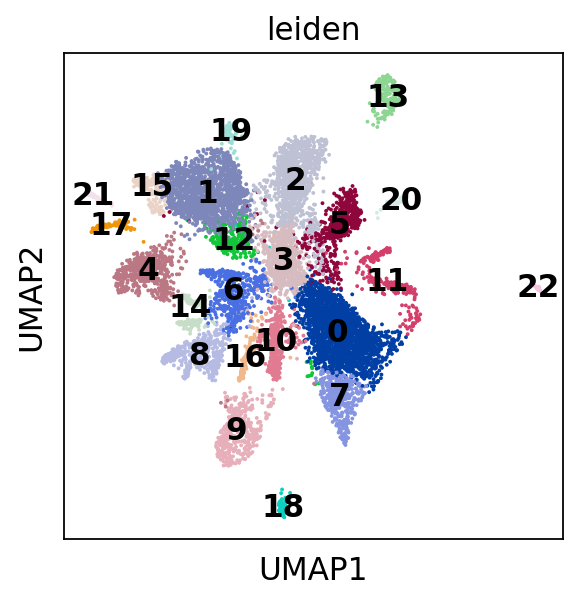

In [6]:
scanpy_data.pca_basic()
scanpy_data.umap_leiden()

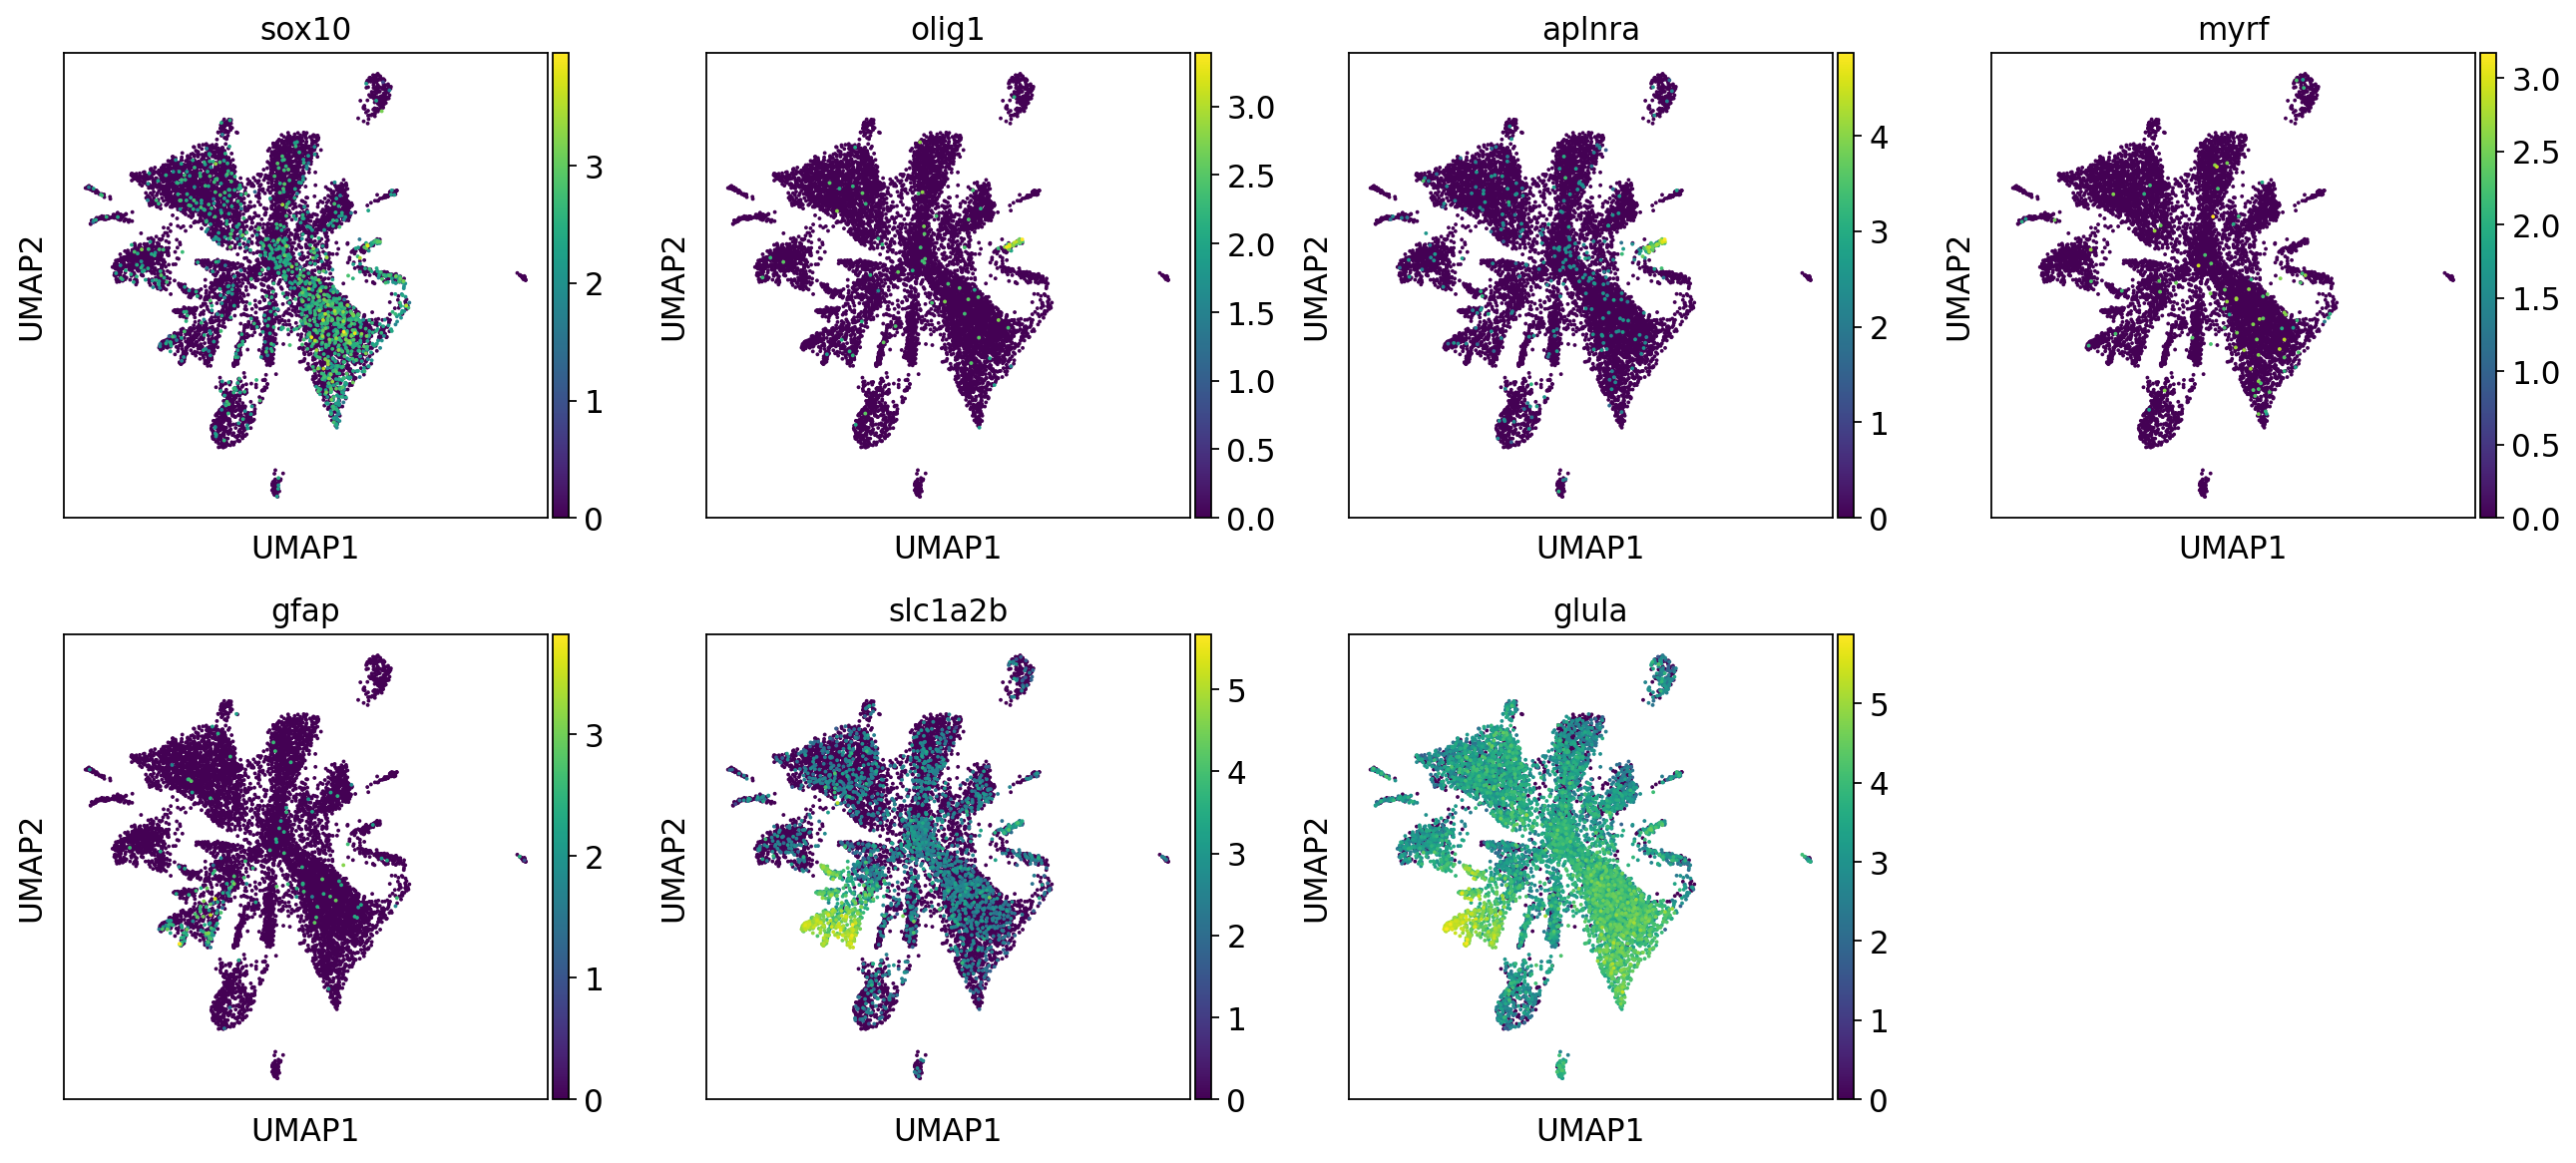

In [7]:
glial_markers = ['sox10', 'olig1', 'aplnra', 'myrf', 'gfap', 'slc1a2b', 'glula']
sc.pl.umap(scanpy_data.adata, color=glial_markers)

In [8]:
orthogroup_data = ScanpyMetaObject(
    matrix = species_BioFileDocket.Orthogroup_exc,
    sampledict = species_SampleDict
    )
orthogroup_data.read()

... writing an h5ad cache file to speedup reading next time


normalizing counts per cell
    finished (0:00:00)


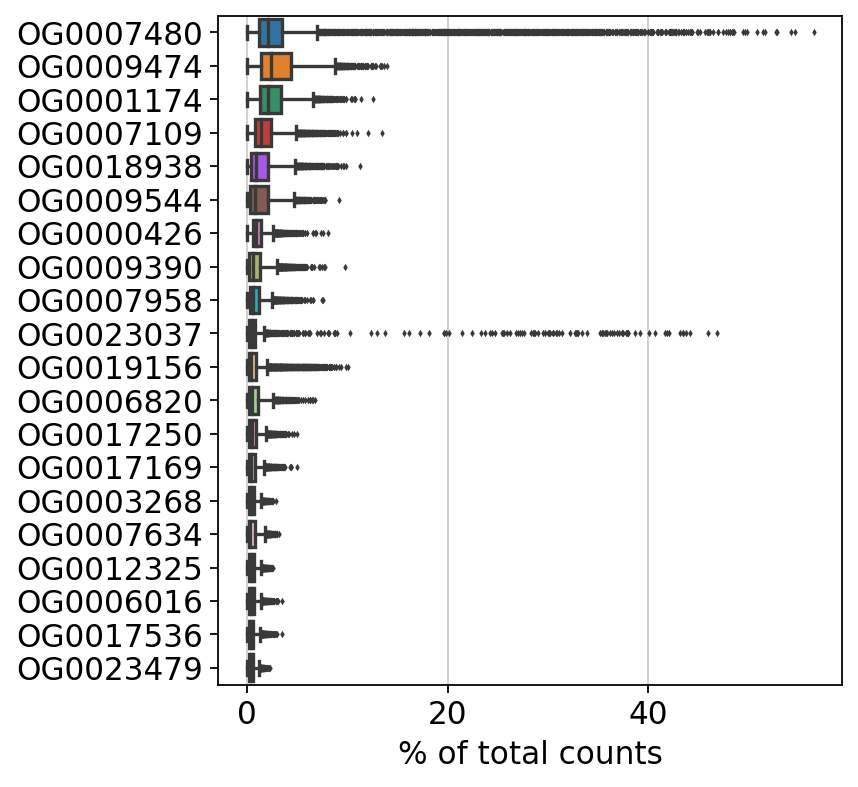

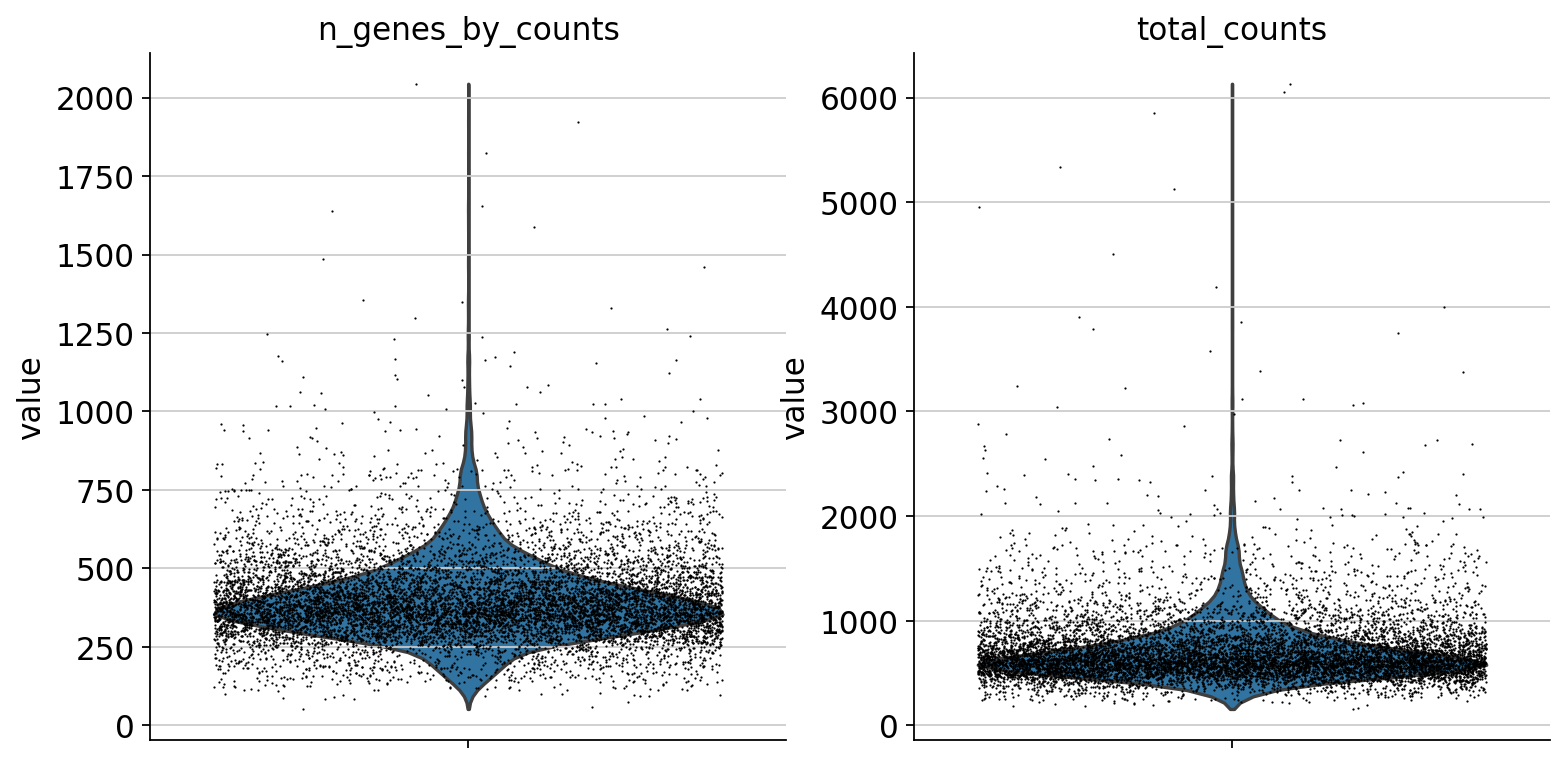

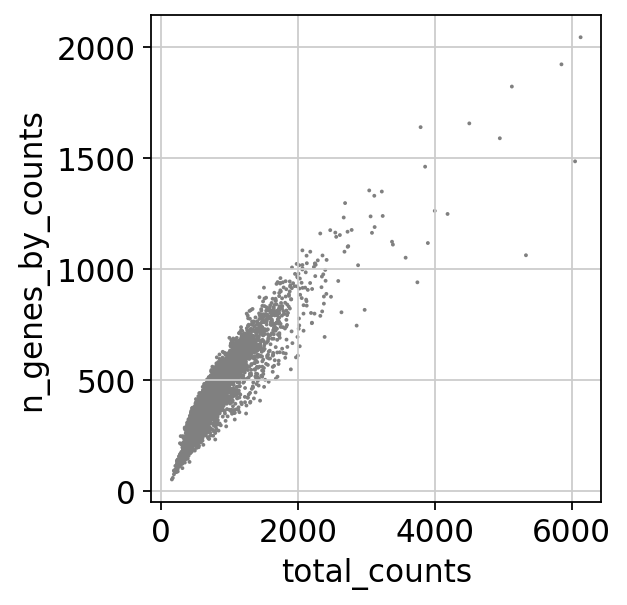

filtered out 13 cells that have less than 100 genes expressed
filtered out 4171 genes that are detected in less than 20 cells


/home/ec2-user/miniconda3/envs/glial_origins/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


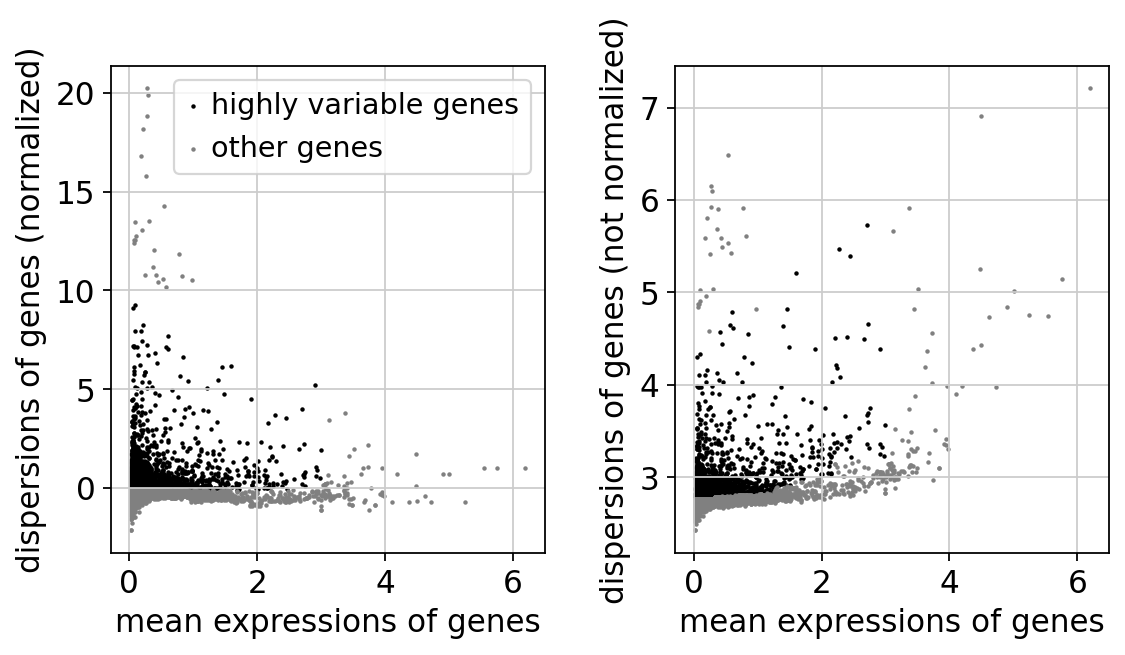

regressing out ['total_counts']
    finished (0:00:52)


In [9]:
sc.pl.highest_expr_genes(orthogroup_data.adata, n_top=20, )
orthogroup_data.violin()
orthogroup_data.cellgene_filter(min_genes=100, min_cells=20)
orthogroup_data.normalize(max_n_genes_by_counts = 7000, target_sum = 1e4)
orthogroup_data.variable_filter(min_mean = 0.0125, max_mean = 3, min_disp = -0.1, max_disp = 10)
orthogroup_data.regress_scale(how = ['total_counts'], max_value = 10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


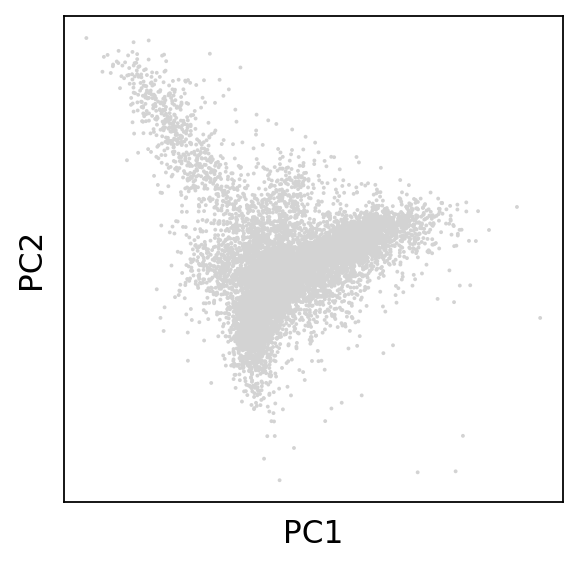

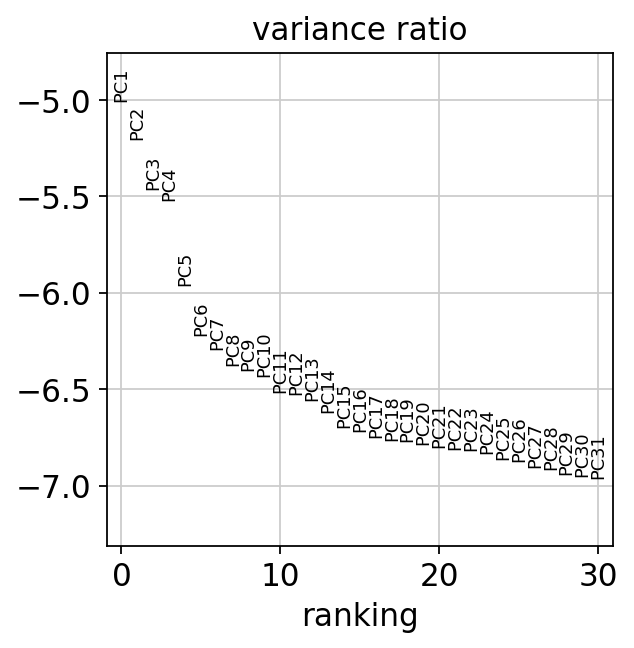

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


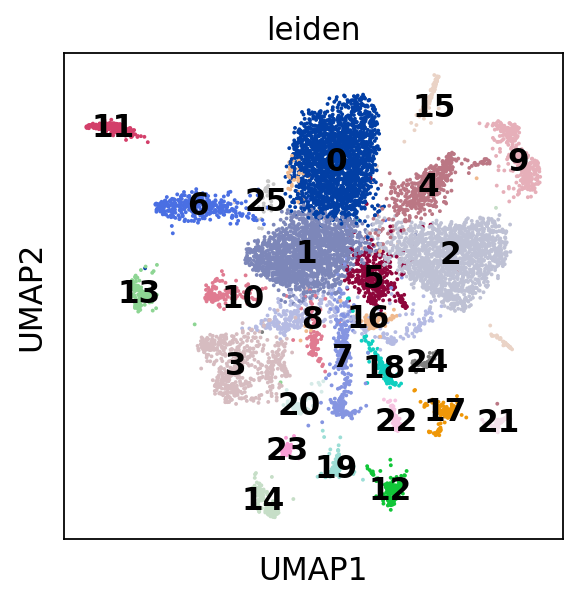

In [10]:
orthogroup_data.pca_basic()
orthogroup_data.umap_leiden()

In [11]:
idmm = pd.read_csv(species_BioFileDocket.og_idmm.path, sep = '\t')
display(idmm)

,gene_name,gene_id,transcript_id,protein_id,Orthogroup
0,rpl24,gene0,rna0,rna0.p1,OG0017530
1,cep97,gene1,rna2,rna2.p1,OG0011687
2,cep97,gene1,rna2,rna2.p3,OG0011687
3,cep97,gene1,rna1,rna1.p1,OG0011687
4,cep97,gene1,rna3,rna3.p1,OG0011687
...,...,...,...,...,...
45381,slc16a6a,gene42256,rna65486,rna65486.p1,OG0015205
45382,slc16a6a,gene42256,rna65488,rna65488.p1,OG0015205
45383,LOC103910035,gene42257,rna65489,rna65489.p1,OG0003589
45384,LOC103910035,gene42257,rna65490,rna65490.p1,OG0003589


In [12]:
glial_hog = [idmm[idmm['gene_name'] == gene]['Orthogroup'].unique() for gene in glial_markers]
glial_hog = [j for i in glial_hog for j in i]
glial_hog = [i for i in glial_hog if i in list(orthogroup_data.adata.var.index)]
display(glial_hog)

['OG0014665', 'OG0011699', 'OG0004819', 'OG0023968', 'OG0011271', 'OG0004873']

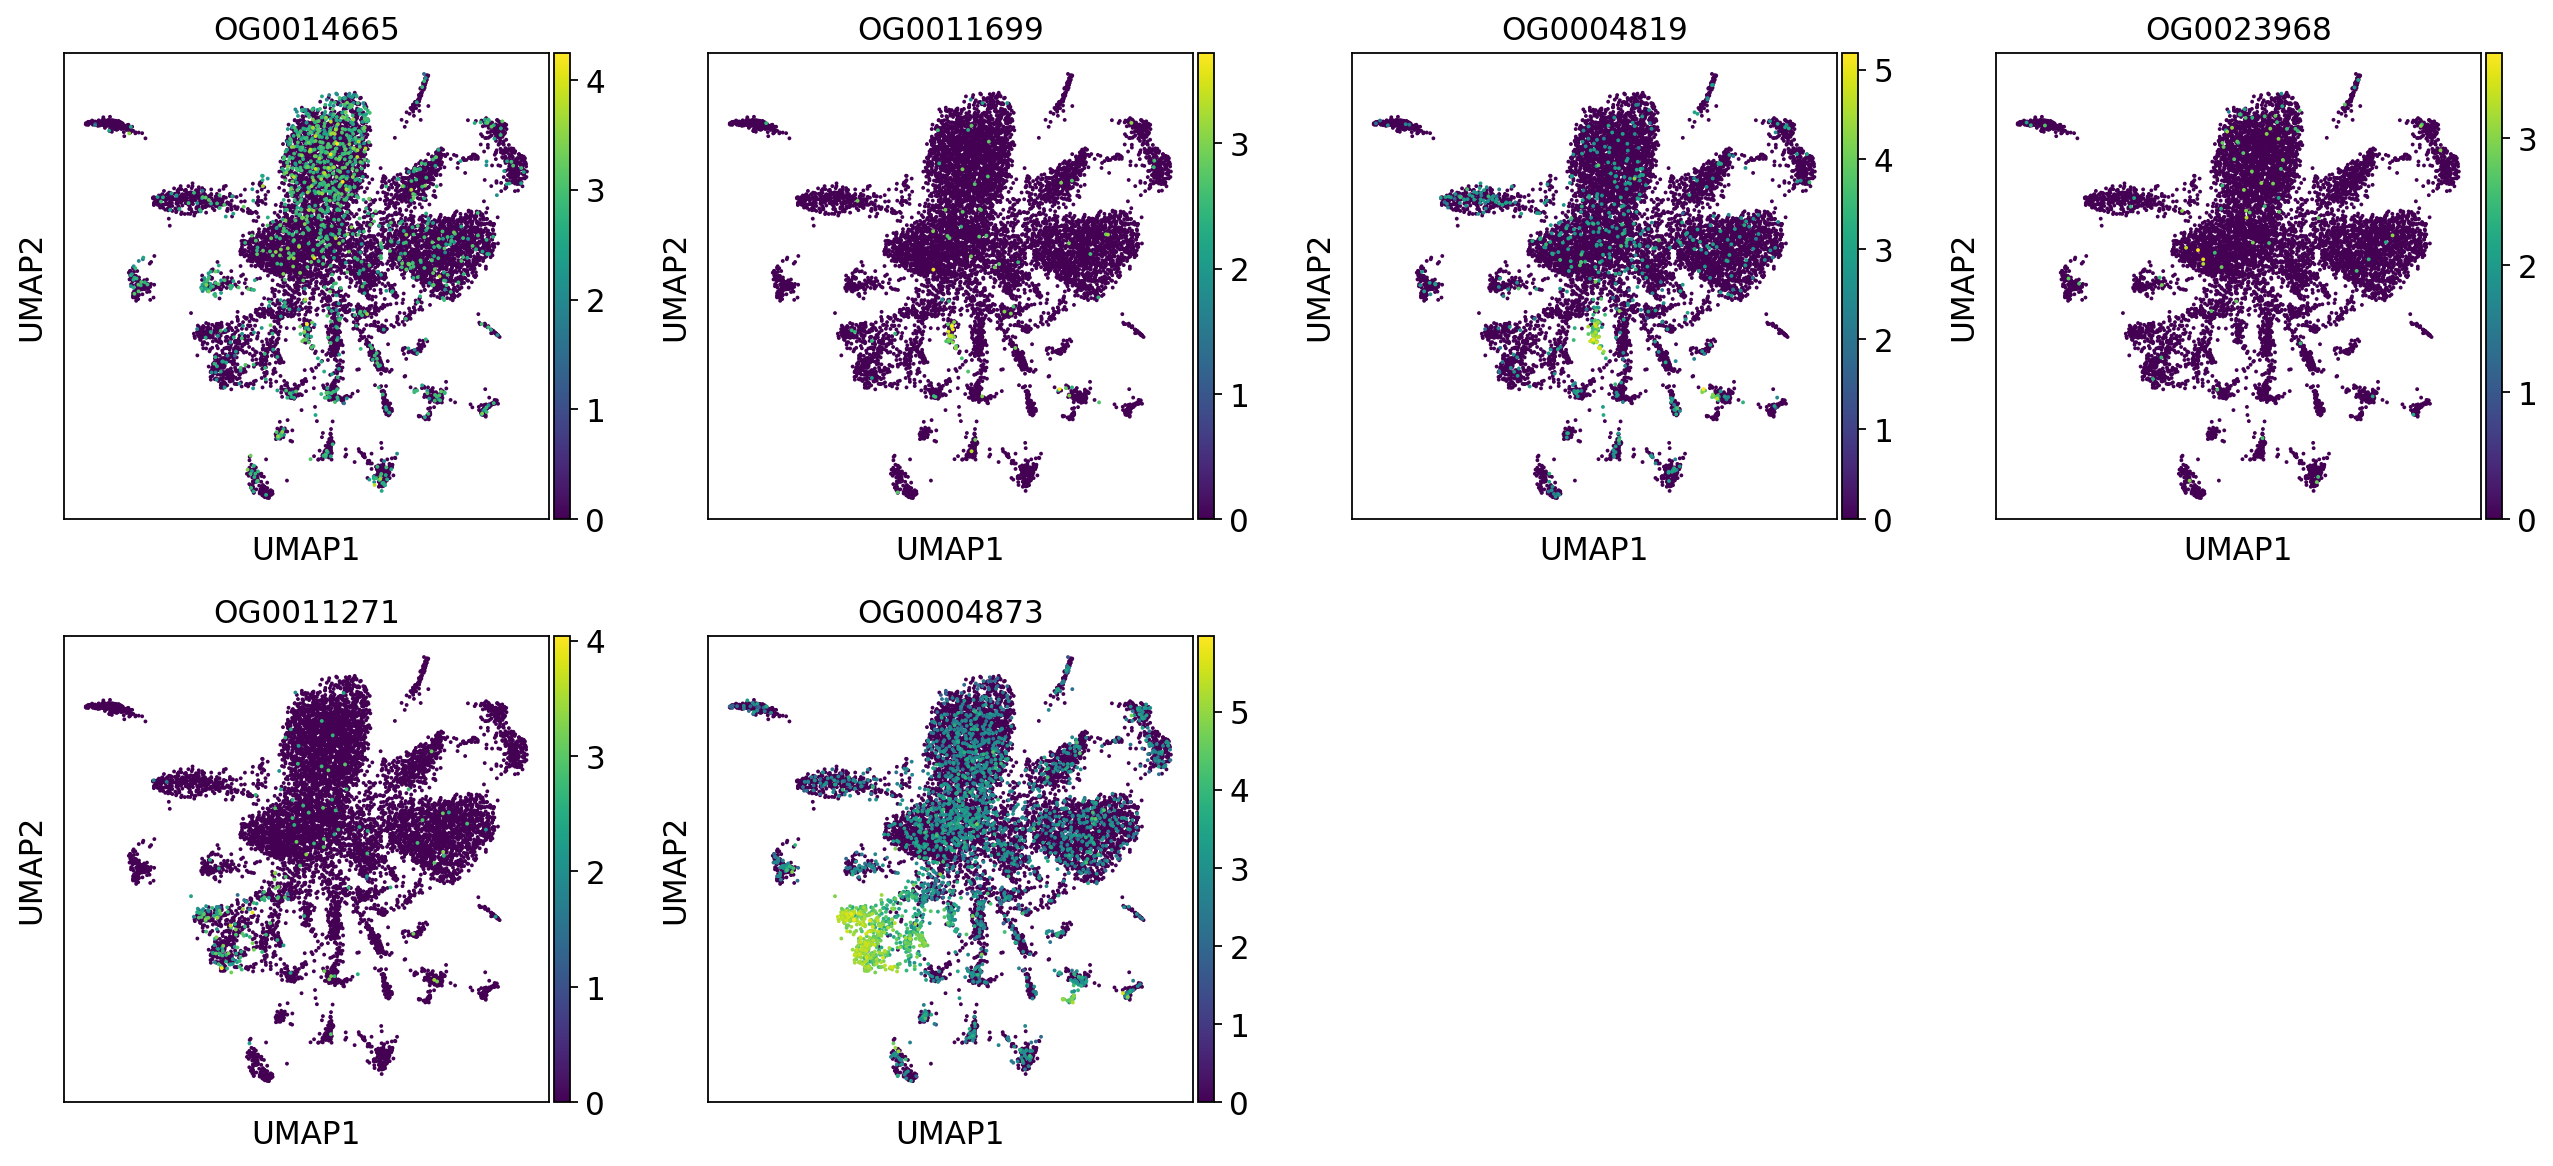

In [13]:
sc.pl.umap(orthogroup_data.adata, color=glial_hog)